In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy as spy

In [3]:
columns = [
    "R_fighter",
    "B_fighter",
    "Winner","weight_class",
    "no_of_rounds",
    "B_wins", 
    "R_wins", 
    "B_losses", 
    "R_losses", 
    "B_age", 
    "R_age", 
    "R_Height_cms",
    "R_Reach_cms",
    "R_Weight_lbs",
    "B_Height_cms",
    "B_Reach_cms",
    "B_Weight_lbs",
    "R_win_by_Submission",
    "R_win_by_Decision_Majority",
    "R_win_by_Decision_Split",
    "R_win_by_Decision_Unanimous",
    "R_win_by_KO/TKO",
    "R_win_by_TKO_Doctor_Stoppage",
    "B_win_by_Submission",
    "B_win_by_Decision_Majority",
    "B_win_by_Decision_Split",
    "B_win_by_Decision_Unanimous",
    "B_win_by_KO/TKO",
    "B_win_by_TKO_Doctor_Stoppage"]
data = pd.read_csv("ufcdata/data.csv",encoding='latin-1', usecols=columns)
data.head()

,R_fighter,B_fighter,Winner,weight_class,no_of_rounds,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Red,Bantamweight,5,1.0,0.0,1.0,0.0,2.0,...,4.0,2.0,0.0,0.0,8.0,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Red,Women's Flyweight,5,6.0,0.0,2.0,1.0,0.0,...,2.0,0.0,2.0,0.0,5.0,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Red,Lightweight,3,8.0,0.0,0.0,7.0,10.0,...,3.0,3.0,6.0,1.0,14.0,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Blue,Bantamweight,3,0.0,0.0,0.0,2.0,2.0,...,4.0,1.0,0.0,0.0,6.0,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Blue,Heavyweight,3,1.0,0.0,0.0,1.0,0.0,...,1.0,2.0,0.0,0.0,3.0,187.96,190.50,264.0,32.0,26.0


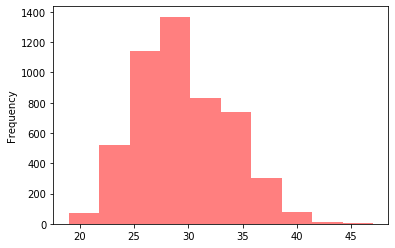

In [4]:
data["R_age"].plot.hist(bins=10, alpha=0.5, color='red')

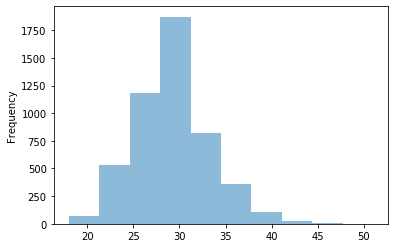

In [5]:
data["B_age"].plot.hist(bins=10, alpha=0.5)

In [6]:
nomeR = data["B_fighter"] == "Henry Cejudo"
pimba = data[nomeR]["B_wins"]
pey = data[nomeR]["B_wins"].max()
final = data[nomeR]["B_wins"] == pey
print("value = ",data[nomeR][final]["Winner"])
#pey = data[nomeR][pimba]
#pimba = data[nomeR][pey]
#data["R_wins"]
#nome = max(max(nomeR["R_wins"]),max(nomeB["B_wins"]))

value =  412    Blue
Name: Winner, dtype: object


In [ ]:
dec = 0
sub = 0
ko = 0
types = data.copy()

import math

types.dropna()
for name in types["R_fighter"]:
    name_R = types["R_fighter"] == name
    name_B = types["B_fighter"] == name
    max_R = types[name_R]["R_wins"].max()
    max_B = types[name_B]["B_wins"].max()
    
    if(max_R != 0 and not math.isnan(max_R) and max_B != 0 and not math.isnan(max_B)):
        if(max_R >= max_B):
            tupla_max = types[name_R]["R_wins"] == max_R
            t = types[name_R][tupla_max]
    
            win_by_Decision = t['R_win_by_Decision_Split'].max();
            win_by_Decision_Majority = t['R_win_by_Decision_Majority'].max()
            win_by_Unanimous = t['R_win_by_Decision_Unanimous'].max()
            win_by_submission = t['R_win_by_Submission'].max()
            win_by_ko = t['R_win_by_KO/TKO'].max()
            win_by_stoppage = t['R_win_by_TKO_Doctor_Stoppage'].max()
            
            dec = dec + win_by_Decision_Majority + win_by_Decision + win_by_Unanimous
            sub = sub + win_by_submission
            ko = ko + win_by_ko + win_by_stoppage

        else:
            tupla_max = types[name_B]["B_wins"] == max_B
            t = types[name_B][tupla_max]
            
            win_by_Decision = t['B_win_by_Decision_Split'].max();
            win_by_Decision_Majority = t['B_win_by_Decision_Majority'].max()
            win_by_Unanimous = t['B_win_by_Decision_Unanimous'].max()
            win_by_submission = t['B_win_by_Submission'].max()
            win_by_ko = t['B_win_by_KO/TKO'].max()
            win_by_stoppage = t['B_win_by_TKO_Doctor_Stoppage'].max()

            dec = dec + win_by_Decision_Majority + win_by_Decision + win_by_Unanimous
            sub = sub + win_by_submission
            ko = ko + win_by_ko + win_by_stoppage
            
        print(dec,sub,ko)   


6.0 0.0 2.0
9.0 2.0 2.0
13.0 8.0 6.0
18.0 8.0 7.0
19.0 8.0 9.0
20.0 10.0 10.0
25.0 13.0 11.0
30.0 13.0 11.0
33.0 16.0 15.0
36.0 16.0 15.0
37.0 16.0 19.0
41.0 16.0 19.0
44.0 18.0 24.0
45.0 18.0 29.0
47.0 19.0 30.0
48.0 19.0 32.0
52.0 19.0 34.0
56.0 19.0 34.0
66.0 22.0 38.0
68.0 26.0 38.0
68.0 29.0 43.0
69.0 42.0 43.0
71.0 42.0 44.0
73.0 43.0 46.0
77.0 43.0 48.0
80.0 46.0 49.0
82.0 49.0 50.0
83.0 49.0 53.0
89.0 49.0 57.0
95.0 50.0 65.0
97.0 50.0 69.0
99.0 53.0 70.0
100.0 57.0 77.0
105.0 57.0 81.0
107.0 58.0 87.0
113.0 58.0 91.0
113.0 58.0 95.0
113.0 59.0 96.0
117.0 59.0 98.0
118.0 62.0 98.0
119.0 66.0 102.0
121.0 69.0 106.0
123.0 73.0 111.0
128.0 74.0 117.0
131.0 77.0 120.0
136.0 79.0 129.0
138.0 80.0 129.0
140.0 83.0 131.0
148.0 90.0 134.0
152.0 90.0 134.0
158.0 92.0 134.0
161.0 92.0 140.0
163.0 94.0 141.0
163.0 94.0 142.0
168.0 94.0 143.0
169.0 94.0 143.0
170.0 94.0 144.0
172.0 94.0 146.0
172.0 96.0 146.0
172.0 96.0 148.0
177.0 98.0 157.0
182.0 100.0 160.0
183.0 100.0 162.0
186.0 100.0

1408.0 610.0 1089.0
1414.0 612.0 1091.0
1417.0 614.0 1096.0
1419.0 618.0 1096.0
1422.0 618.0 1096.0
1425.0 618.0 1097.0
1431.0 620.0 1099.0
1433.0 624.0 1104.0
1434.0 624.0 1108.0
1438.0 627.0 1110.0
1440.0 629.0 1111.0
1442.0 630.0 1111.0
1445.0 633.0 1114.0
1449.0 634.0 1119.0
1454.0 640.0 1119.0
1456.0 640.0 1119.0
1457.0 640.0 1119.0
1464.0 646.0 1129.0
1466.0 646.0 1139.0
1470.0 649.0 1141.0
1476.0 650.0 1149.0
1477.0 650.0 1150.0
1477.0 651.0 1151.0
1478.0 652.0 1151.0
1482.0 653.0 1152.0
1483.0 653.0 1153.0
1485.0 653.0 1160.0
1486.0 653.0 1167.0
1487.0 653.0 1169.0
1489.0 657.0 1170.0
1489.0 659.0 1171.0
1492.0 659.0 1174.0
1497.0 662.0 1174.0
1504.0 662.0 1179.0
1505.0 662.0 1181.0
1506.0 662.0 1181.0
1514.0 663.0 1187.0
1517.0 665.0 1187.0
1524.0 668.0 1187.0
1526.0 668.0 1188.0
1528.0 668.0 1189.0
1530.0 668.0 1199.0
1534.0 671.0 1200.0
1538.0 671.0 1201.0
1543.0 673.0 1204.0
1544.0 673.0 1206.0
1545.0 677.0 1210.0
1551.0 679.0 1211.0
1552.0 680.0 1211.0
1555.0 681.0 1213.0


2688.0 1156.0 2124.0
2690.0 1156.0 2124.0
2691.0 1157.0 2127.0
2693.0 1161.0 2132.0
2694.0 1161.0 2134.0
2700.0 1163.0 2136.0
2700.0 1163.0 2137.0
2701.0 1167.0 2138.0
2703.0 1167.0 2139.0
2708.0 1168.0 2139.0
2711.0 1169.0 2139.0
2714.0 1171.0 2139.0
2721.0 1177.0 2149.0
2726.0 1179.0 2158.0
2732.0 1181.0 2159.0
2736.0 1184.0 2165.0
2744.0 1185.0 2167.0
2744.0 1186.0 2168.0
2745.0 1187.0 2171.0
2747.0 1189.0 2171.0
2751.0 1189.0 2173.0
2753.0 1196.0 2178.0
2759.0 1198.0 2178.0
2762.0 1201.0 2180.0
2767.0 1201.0 2180.0
2767.0 1206.0 2181.0
2770.0 1209.0 2182.0
2770.0 1209.0 2186.0
2772.0 1211.0 2191.0
2776.0 1211.0 2192.0
2780.0 1212.0 2199.0
2788.0 1213.0 2203.0
2790.0 1215.0 2205.0
2798.0 1215.0 2210.0
2800.0 1219.0 2210.0
2803.0 1221.0 2215.0
2803.0 1221.0 2217.0
2805.0 1224.0 2221.0
2806.0 1225.0 2223.0
2809.0 1231.0 2223.0
2812.0 1231.0 2227.0
2812.0 1232.0 2228.0
2814.0 1239.0 2229.0
2815.0 1240.0 2232.0
2815.0 1241.0 2233.0
2818.0 1241.0 2234.0
2820.0 1241.0 2235.0
2821.0 1241.0

3935.0 1730.0 3107.0
3935.0 1735.0 3109.0
3935.0 1735.0 3112.0
3945.0 1736.0 3115.0
3957.0 1736.0 3120.0
3958.0 1736.0 3120.0
3961.0 1739.0 3131.0
3964.0 1740.0 3135.0
3965.0 1740.0 3137.0
3966.0 1740.0 3140.0
3967.0 1740.0 3141.0
3967.0 1740.0 3143.0
3968.0 1742.0 3143.0
3972.0 1742.0 3144.0
3974.0 1742.0 3146.0
3977.0 1742.0 3148.0
3984.0 1748.0 3158.0
3986.0 1749.0 3164.0
3988.0 1749.0 3168.0
3994.0 1751.0 3169.0
4000.0 1752.0 3171.0
4003.0 1754.0 3172.0
4005.0 1755.0 3174.0
4005.0 1756.0 3175.0
4006.0 1757.0 3180.0
4007.0 1759.0 3182.0
4008.0 1759.0 3183.0
4009.0 1759.0 3185.0
4017.0 1759.0 3190.0
4018.0 1759.0 3198.0
4020.0 1763.0 3203.0
4028.0 1764.0 3207.0
4028.0 1768.0 3208.0
4031.0 1770.0 3213.0
4035.0 1771.0 3214.0
4037.0 1771.0 3224.0
4040.0 1773.0 3224.0
4042.0 1773.0 3224.0
4042.0 1777.0 3224.0
4044.0 1777.0 3224.0
4046.0 1777.0 3235.0
4047.0 1778.0 3239.0
4052.0 1780.0 3242.0
4054.0 1780.0 3242.0
4056.0 1784.0 3243.0
4063.0 1785.0 3244.0
4067.0 1785.0 3248.0
4069.0 1785.0

5213.0 2276.0 4156.0
5215.0 2279.0 4158.0
5216.0 2282.0 4159.0
5223.0 2284.0 4162.0
5225.0 2285.0 4162.0
5227.0 2289.0 4164.0
5229.0 2290.0 4164.0
5237.0 2290.0 4169.0
5238.0 2290.0 4177.0
5244.0 2290.0 4178.0
5251.0 2290.0 4183.0
5257.0 2290.0 4185.0
5260.0 2290.0 4188.0
5265.0 2290.0 4189.0
5273.0 2290.0 4189.0
5273.0 2293.0 4192.0
5277.0 2295.0 4192.0
5280.0 2296.0 4198.0
5283.0 2296.0 4202.0
5287.0 2302.0 4206.0
5291.0 2302.0 4210.0
5292.0 2302.0 4211.0
5294.0 2302.0 4221.0
5297.0 2304.0 4222.0
5297.0 2304.0 4225.0
5304.0 2304.0 4232.0
5310.0 2307.0 4232.0
5317.0 2307.0 4234.0
5322.0 2309.0 4237.0
5326.0 2309.0 4241.0
5332.0 2311.0 4243.0
5334.0 2311.0 4243.0
5336.0 2311.0 4244.0
5338.0 2311.0 4244.0
5346.0 2313.0 4244.0
5351.0 2315.0 4253.0
5359.0 2316.0 4258.0
5363.0 2317.0 4259.0
5370.0 2320.0 4259.0
5373.0 2322.0 4259.0
5376.0 2323.0 4260.0
5377.0 2327.0 4261.0
5380.0 2327.0 4261.0
5380.0 2328.0 4262.0
5383.0 2331.0 4273.0
5386.0 2332.0 4278.0
5388.0 2339.0 4283.0
5393.0 2344.0

6561.0 2826.0 5158.0
6571.0 2826.0 5168.0
6576.0 2826.0 5172.0
6579.0 2826.0 5175.0
6584.0 2829.0 5183.0
6592.0 2829.0 5184.0
6593.0 2829.0 5184.0
6594.0 2829.0 5186.0
6597.0 2829.0 5188.0
6600.0 2833.0 5188.0
6604.0 2833.0 5190.0
6606.0 2833.0 5190.0
6607.0 2836.0 5190.0
6609.0 2838.0 5191.0
6617.0 2842.0 5193.0
6622.0 2842.0 5195.0
6627.0 2842.0 5196.0
6632.0 2847.0 5198.0
6637.0 2853.0 5198.0
6639.0 2853.0 5205.0
6645.0 2856.0 5205.0
6647.0 2858.0 5206.0
6650.0 2858.0 5208.0
6657.0 2861.0 5208.0
6658.0 2862.0 5210.0
6661.0 2862.0 5210.0
6666.0 2865.0 5210.0
6670.0 2865.0 5210.0
6671.0 2868.0 5211.0
6679.0 2868.0 5216.0
6681.0 2868.0 5221.0
6693.0 2868.0 5226.0
6697.0 2868.0 5226.0
6699.0 2872.0 5231.0
6704.0 2874.0 5234.0
6708.0 2876.0 5234.0
6714.0 2878.0 5235.0
6717.0 2878.0 5235.0
6718.0 2878.0 5235.0
6718.0 2879.0 5235.0
6718.0 2882.0 5235.0
6721.0 2884.0 5240.0
6728.0 2884.0 5244.0
6731.0 2885.0 5245.0
6732.0 2892.0 5245.0
6734.0 2893.0 5246.0
6735.0 2894.0 5247.0
6736.0 2896.0